In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
print(np.__version__)

1.19.2


In [3]:
print(pd.__version__)

1.1.5


In [4]:
df  = pd.read_csv('training_set1.csv')

In [5]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3239 non-null   float64
 1   HAEMOGLOBINS  3239 non-null   float64
 2   ERYTHROCYTE   3239 non-null   float64
 3   LEUCOCYTE     3239 non-null   float64
 4   THROMBOCYTE   3239 non-null   int64  
 5   MCH           3239 non-null   float64
 6   MCHC          3239 non-null   float64
 7   MCV           3239 non-null   float64
 8   AGE           3239 non-null   int64  
 9   SEX           3239 non-null   object 
 10  SOURCE        3239 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 278.5+ KB


In [7]:
df.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [8]:
df.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

In [9]:
df.dtypes

HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX              object
SOURCE            int64
dtype: object

In [10]:
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
count,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000
mean,38.217969,12.749244,4.545838,8.729299,258.914480,28.222106,33.333838,84.593547,46.515900,0.400432
std,5.941415,2.083369,0.782490,5.006633,112.837554,2.700713,1.249906,6.916984,21.850642,0.490062
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,190.500000,27.200000,32.700000,81.500000,29.000000,0.000000
50%,38.600000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,47.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.750000,64.000000,1.000000
max,58.100000,18.900000,7.630000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,1.000000


In [11]:
jk = {"M" : 1, "F" : 0}
df["SEX"] = df["SEX"].map(jk)

array([[<AxesSubplot:title={'center':'HAEMATOCRIT'}>,
        <AxesSubplot:title={'center':'HAEMOGLOBINS'}>,
        <AxesSubplot:title={'center':'ERYTHROCYTE'}>],
       [<AxesSubplot:title={'center':'LEUCOCYTE'}>,
        <AxesSubplot:title={'center':'THROMBOCYTE'}>,
        <AxesSubplot:title={'center':'MCH'}>],
       [<AxesSubplot:title={'center':'MCHC'}>,
        <AxesSubplot:title={'center':'MCV'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'SOURCE'}>, <AxesSubplot:>]],
      dtype=object)

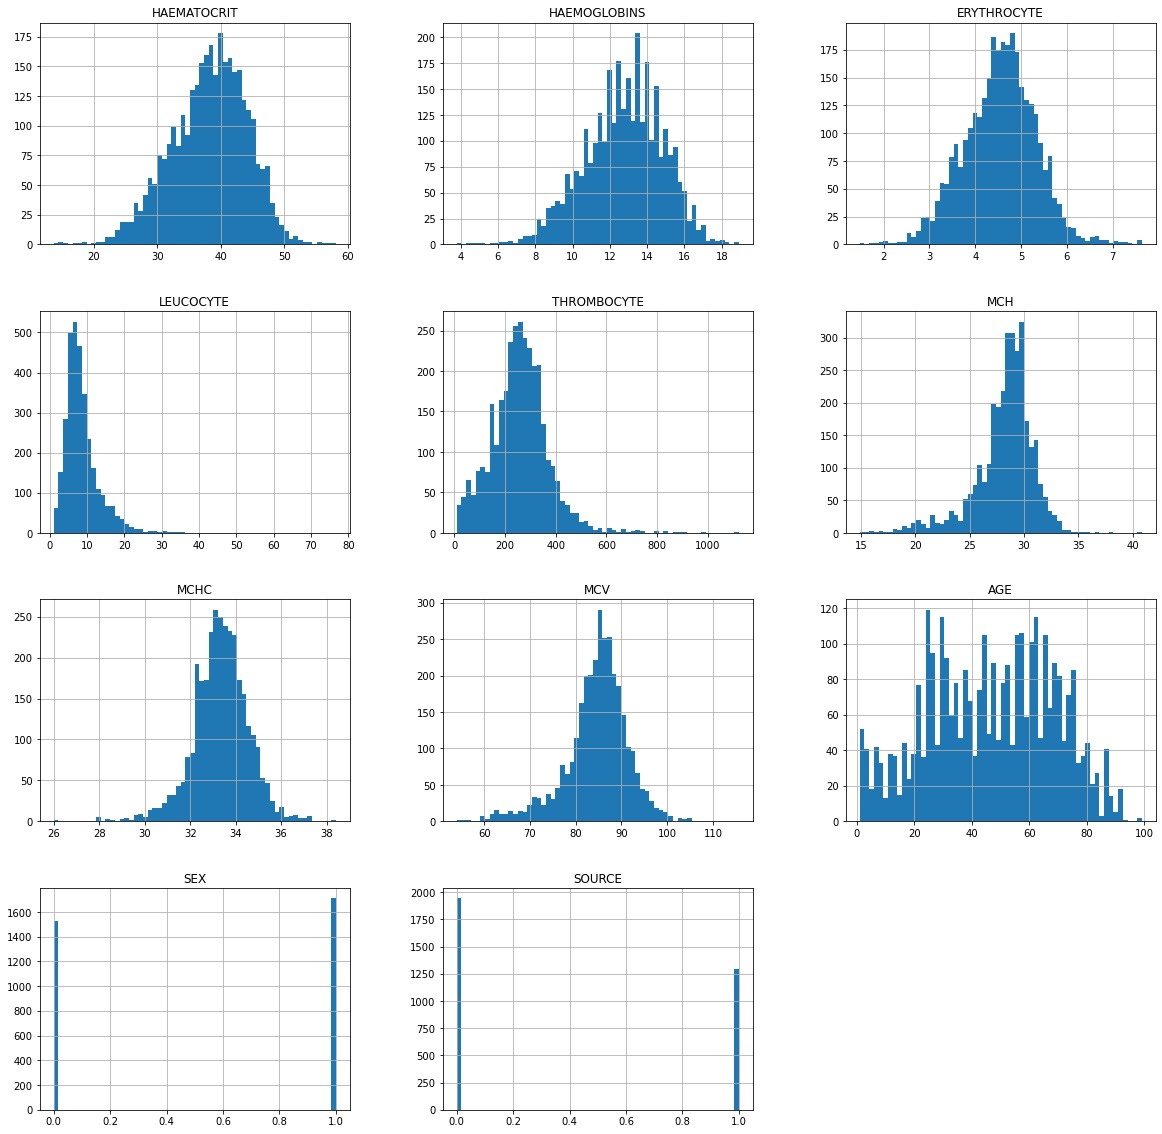

In [12]:
df.hist(bins=60,figsize=(20,20))

<AxesSubplot:>

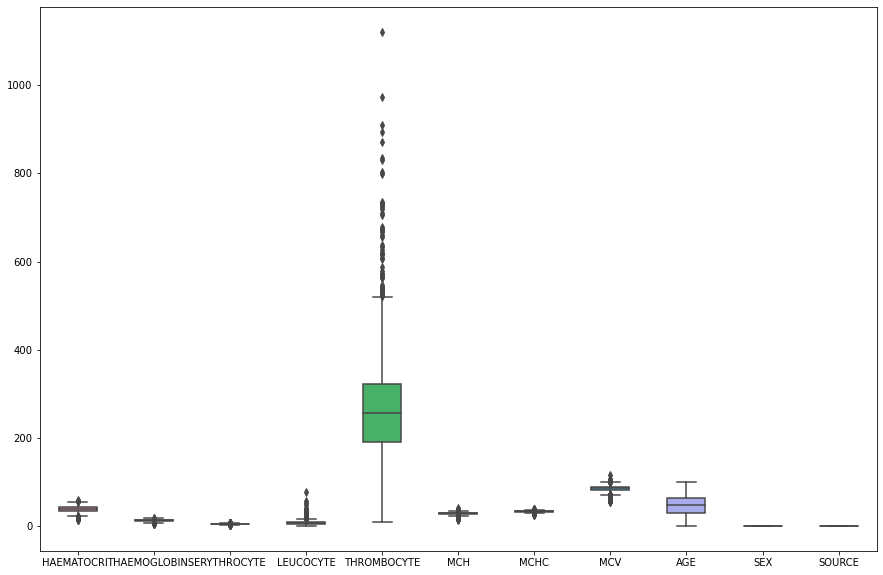

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=5)

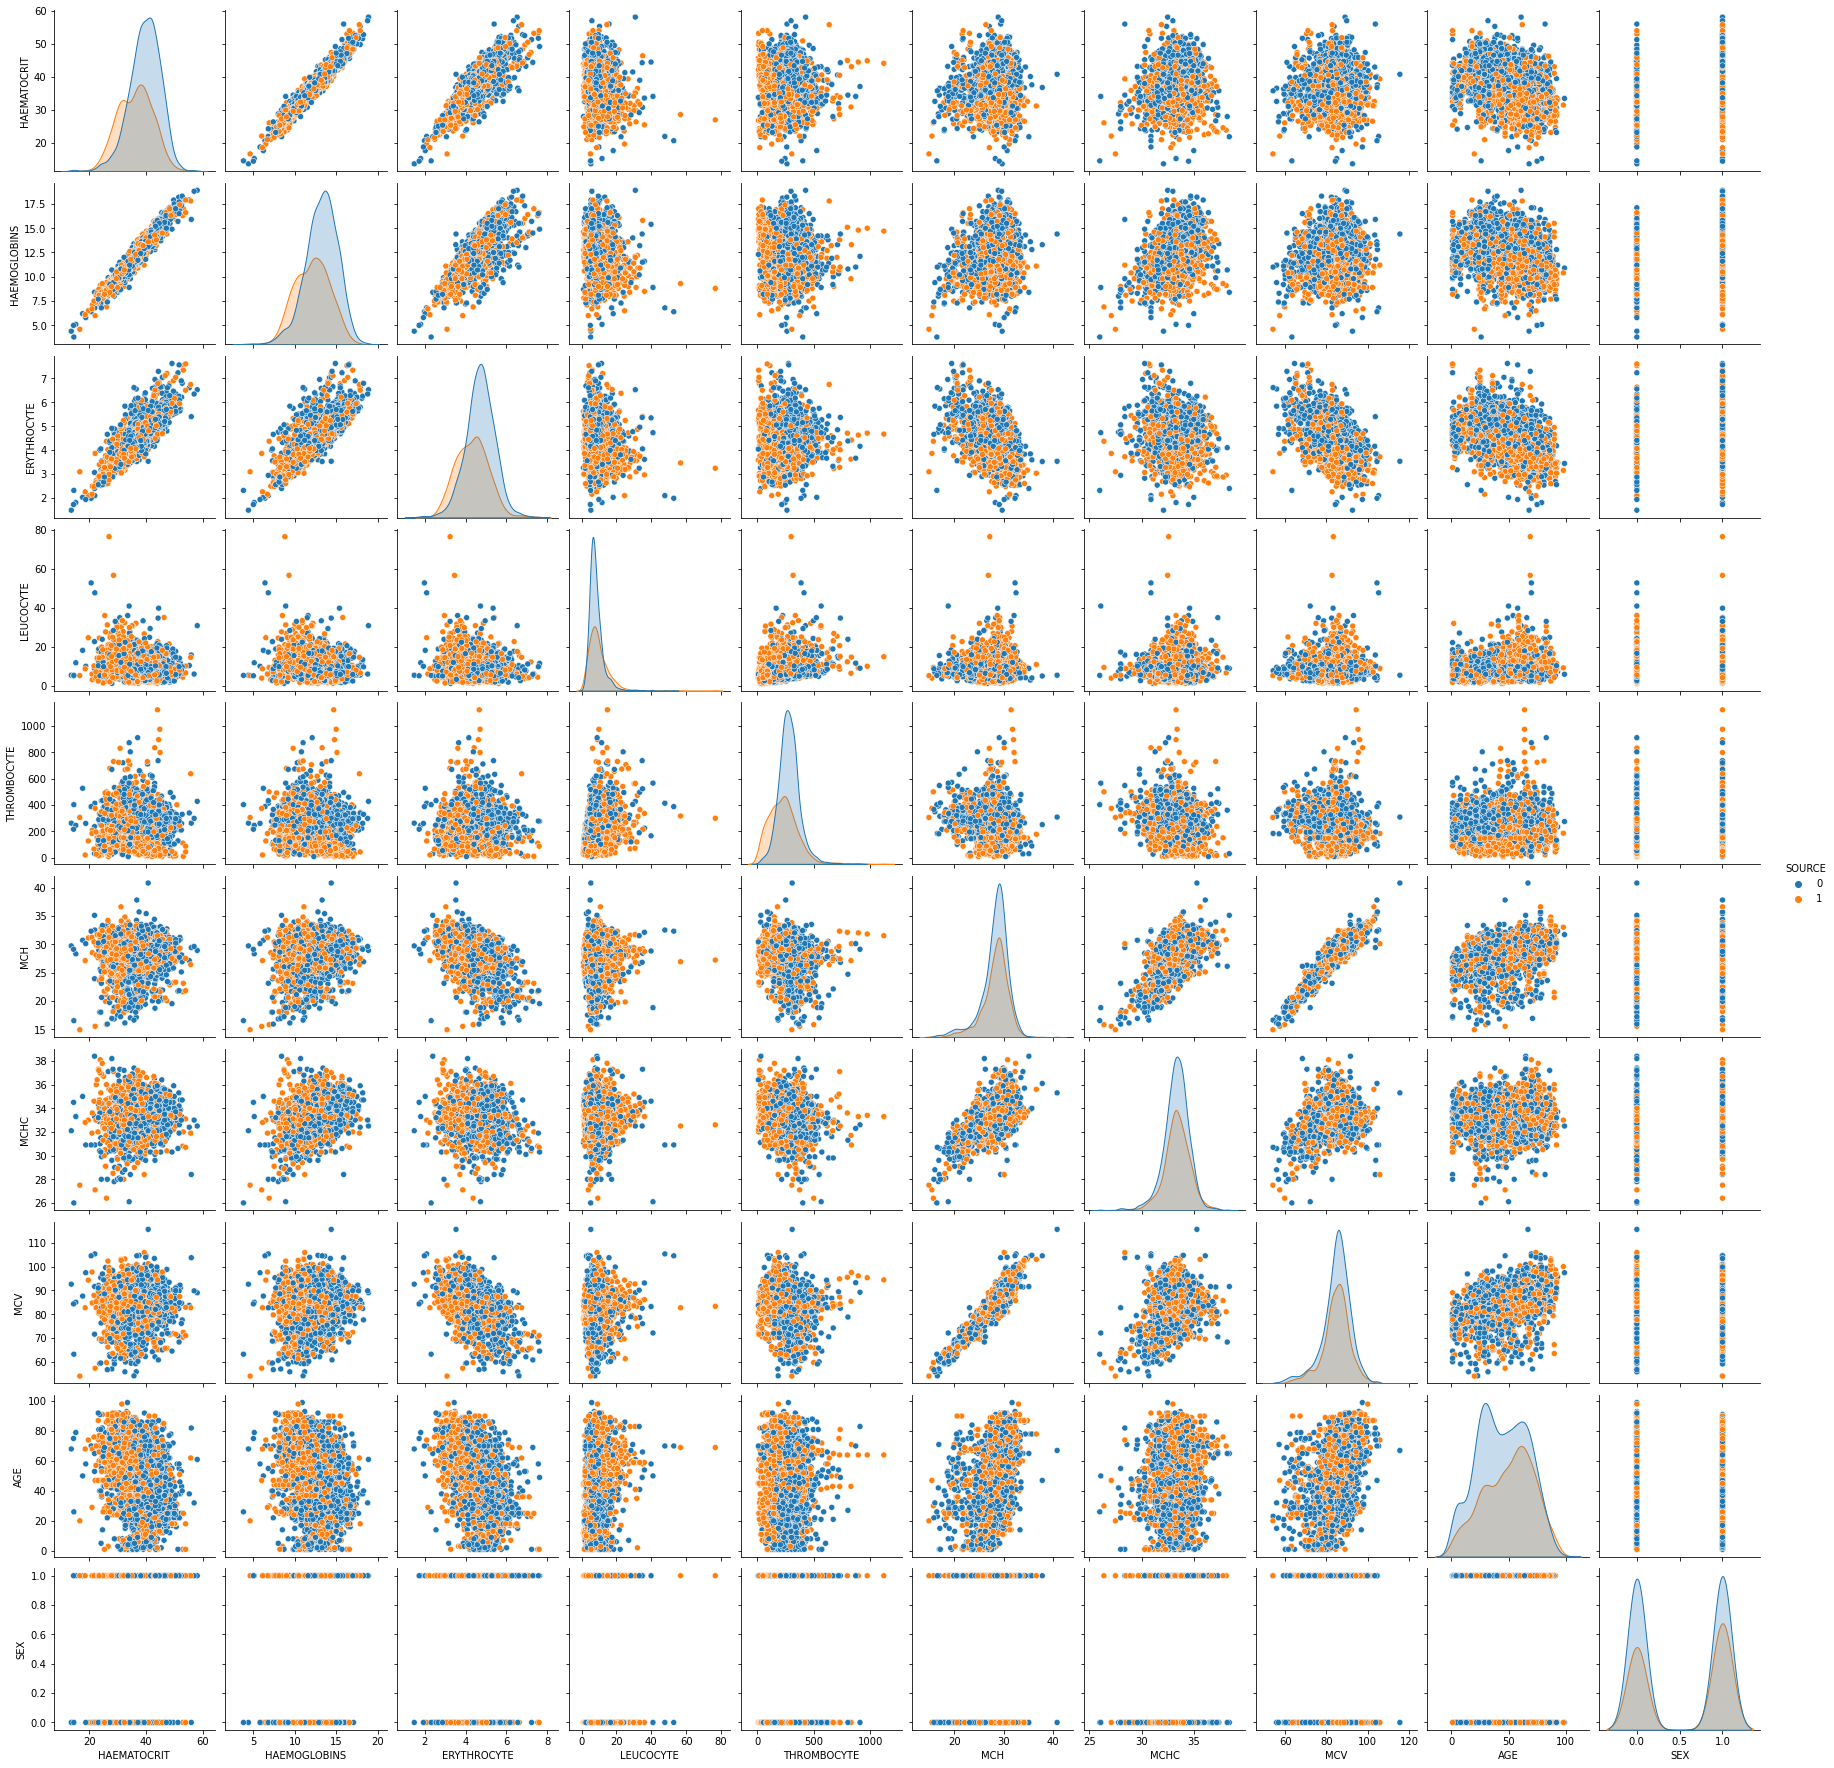

In [14]:
sns.pairplot(df, hue = 'SOURCE')

univariate analysis

In [15]:
df['HAEMATOCRIT'].describe()

count    3239.000000
mean       38.217969
std         5.941415
min        13.700000
25%        34.300000
50%        38.600000
75%        42.500000
max        58.100000
Name: HAEMATOCRIT, dtype: float64

In [16]:
df['SOURCE'].describe()

count    3239.000000
mean        0.400432
std         0.490062
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: SOURCE, dtype: float64

In [17]:
one = 0
zero =0
for i in df['SOURCE']:
    if(i==1):
        one = one+1
    else:
        zero = zero+1
print(one)
print(zero)
    
    

1297
1942


D:\conda\envs\pc\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HAEMATOCRIT'>

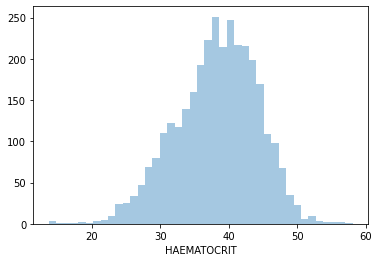

In [18]:
sns.distplot(df['HAEMATOCRIT'], hist = True, kde = False, rug = False)

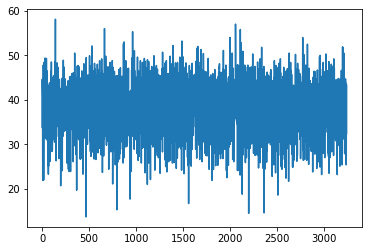

In [19]:
plt.plot(df['HAEMATOCRIT'])

D:\conda\envs\pc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HAEMATOCRIT'>

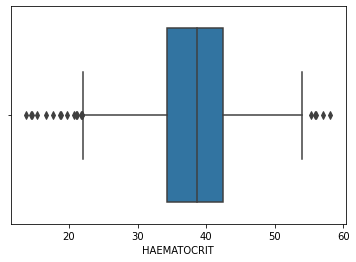

In [20]:
sns.boxplot(df['HAEMATOCRIT'])

In [21]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['HAEMATOCRIT']))
print(z)

[0.74370342 1.07432605 0.78815475 ... 0.00302475 0.87232278 0.97937391]


In [22]:
threshold = 3
print(np.where(z > 3))

(array([ 141,  367,  467,  795,  935, 1558, 2057, 2128, 2197, 2361, 2507],
      dtype=int64),)


In [23]:
df.drop(df['HAEMATOCRIT'][(z > 3)].index,inplace= True)

In [24]:
df.shape

(3228, 11)

D:\conda\envs\pc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HAEMATOCRIT'>

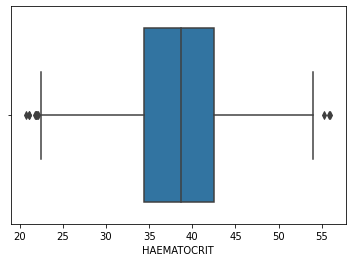

In [25]:
sns.boxplot(df['HAEMATOCRIT'])

In [26]:
#HAEMOGLOBINS

In [27]:
df['HAEMOGLOBINS'].describe()

count    3228.000000
mean       12.766295
std         2.043052
min         6.000000
25%        11.400000
50%        12.900000
75%        14.200000
max        18.300000
Name: HAEMOGLOBINS, dtype: float64

D:\conda\envs\pc\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HAEMOGLOBINS'>

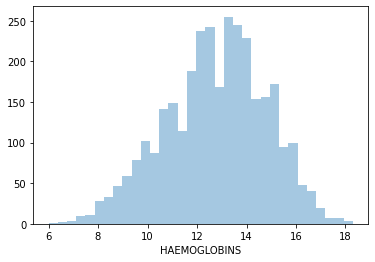

In [28]:
sns.distplot(df['HAEMOGLOBINS'], hist = True, kde = False, rug = False)

<AxesSubplot:xlabel='HAEMOGLOBINS'>

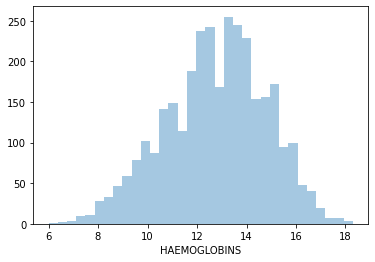

In [29]:
sns.distplot(df['HAEMOGLOBINS'], hist = True, kde = False, rug = False)

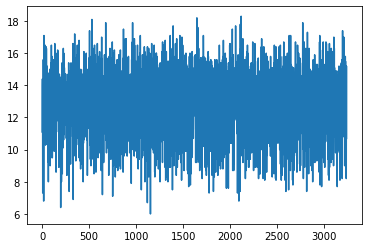

In [30]:
plt.plot(df['HAEMOGLOBINS'])

D:\conda\envs\pc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HAEMOGLOBINS'>

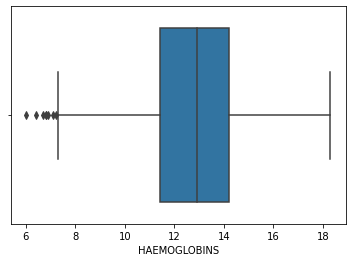

In [31]:
sns.boxplot(df['HAEMOGLOBINS'])

In [32]:
Q1 = df['HAEMOGLOBINS'].quantile(0.25)
Q3 = df['HAEMOGLOBINS'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2.799999999999999


In [33]:
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
 


In [34]:
#ERYTHROCYTE

In [35]:
df['ERYTHROCYTE'].describe()

count    3228.000000
mean        4.551549
std         0.771095
min         1.980000
25%         4.040000
50%         4.580000
75%         5.060000
max         7.630000
Name: ERYTHROCYTE, dtype: float64

D:\conda\envs\pc\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ERYTHROCYTE'>

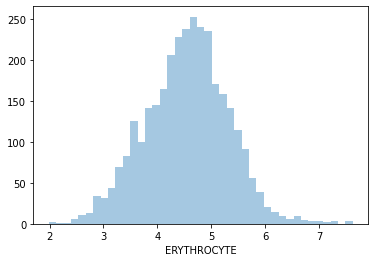

In [36]:
sns.distplot(df['ERYTHROCYTE'], hist = True, kde = False, rug = False)

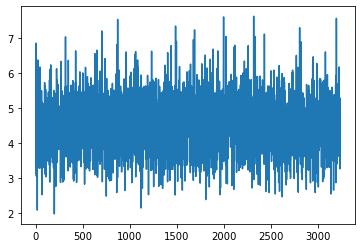

In [37]:
plt.plot(df['ERYTHROCYTE'])

D:\conda\envs\pc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ERYTHROCYTE'>

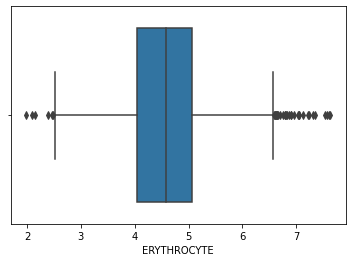

In [38]:
sns.boxplot(df['ERYTHROCYTE'])

In [39]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['ERYTHROCYTE']))
print(z)

[0.48192048 2.99419457 0.02393208 ... 0.19656775 0.95781374 1.15639057]


In [40]:
threshold = 3
print(np.where(z > 3))

(array([  16,  196,  315,  699,  867, 1114, 1482, 1491, 1671, 1683, 1992,
       2016, 2309, 2325, 2422, 2796, 2811, 3187], dtype=int64),)


In [41]:
df.drop(df['ERYTHROCYTE'][(z > 3)].index,inplace= True)

In [42]:
df.shape

(3210, 11)

D:\conda\envs\pc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ERYTHROCYTE'>

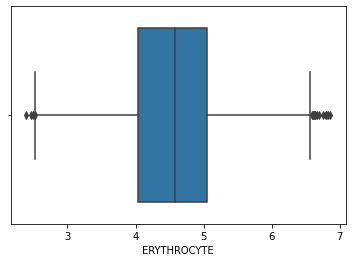

In [43]:
sns.boxplot(df['ERYTHROCYTE'])

In [44]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['ERYTHROCYTE']))
threshold = 3
print(np.where(z > 3))

(array([   1,  858, 1429, 2098, 2239], dtype=int64),)


In [45]:
#LEUCOCYTE

In [46]:
df['LEUCOCYTE'].describe()

count    3210.000000
mean        8.700654
std         4.887050
min         1.100000
25%         5.700000
50%         7.600000
75%        10.300000
max        76.600000
Name: LEUCOCYTE, dtype: float64

D:\conda\envs\pc\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LEUCOCYTE'>

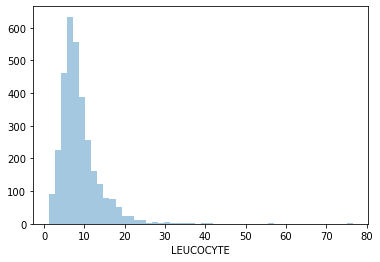

In [47]:
sns.distplot(df['LEUCOCYTE'], hist = True, kde = False, rug = False)

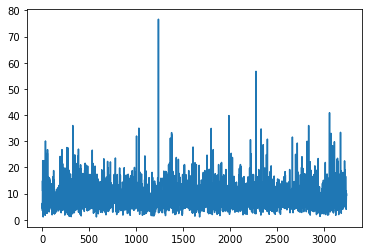

In [48]:
plt.plot(df['LEUCOCYTE'])

D:\conda\envs\pc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LEUCOCYTE'>

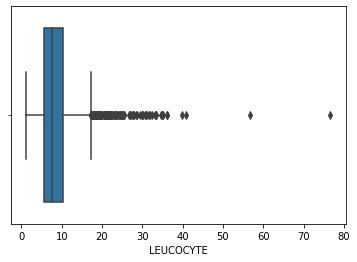

In [49]:
sns.boxplot(df['LEUCOCYTE'])

In [50]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['LEUCOCYTE']))
print(z)


[0.83921644 0.49130416 0.51176959 ... 0.06153017 0.28638211 0.14312411]


In [51]:
threshold = 3
print(np.where(z > 3))

(array([  34,   54,   56,  189,  208,  260,  270,  322,  343,  374,  381,
        527,  772,  994, 1019, 1083, 1226, 1353, 1366, 1371, 1416, 1591,
       1738, 1782, 1804, 1971, 1994, 2006, 2195, 2202, 2254, 2255, 2307,
       2329, 2362, 2372, 2636, 2670, 2688, 2738, 2792, 2807, 2908, 3029,
       3045, 3061, 3081, 3114, 3146], dtype=int64),)


In [52]:
df.drop(df['LEUCOCYTE'][(z > 3)].index,inplace= True)

D:\conda\envs\pc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LEUCOCYTE'>

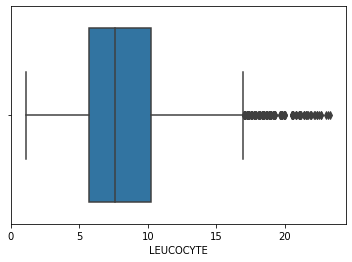

In [53]:
sns.boxplot(df['LEUCOCYTE'])

In [54]:
#THROMBOCYTE  

In [55]:
df['THROMBOCYTE']

0       150
1       232
2       336
3       276
4       711
       ... 
3234     50
3235     90
3236    328
3237    326
3238    214
Name: THROMBOCYTE, Length: 3161, dtype: int64

In [56]:
df['THROMBOCYTE'].describe()

count    3161.000000
mean      258.248023
std       110.973354
min        10.000000
25%       191.000000
50%       257.000000
75%       322.000000
max      1121.000000
Name: THROMBOCYTE, dtype: float64

D:\conda\envs\pc\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='THROMBOCYTE'>

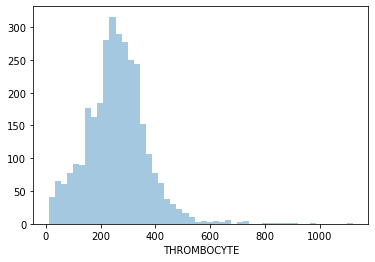

In [57]:
sns.distplot(df['THROMBOCYTE'], hist = True, kde = False, rug = False)

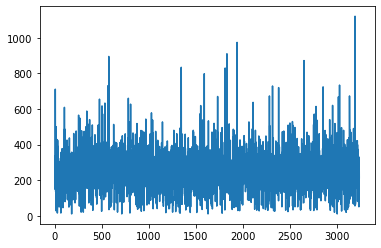

In [58]:
plt.plot(df['THROMBOCYTE'])

D:\conda\envs\pc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='THROMBOCYTE'>

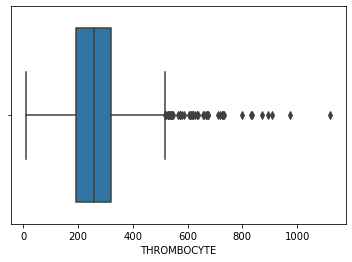

In [59]:
sns.boxplot(df['THROMBOCYTE'])

In [60]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['THROMBOCYTE']))
print(z)

[0.9755959  0.23656287 0.70074731 ... 0.62864652 0.61062133 0.39878964]


In [61]:
threshold = 3
print(np.where(z > 3))

(array([   4,   97,  457,  484,  515,  545,  555,  761,  784, 1316, 1517,
       1554, 1693, 1771, 1789, 1895, 1897, 2061, 2229, 2262, 2322, 2588,
       2712, 2783, 2883, 2945, 2957, 3059, 3116], dtype=int64),)


In [62]:
df.drop(df['THROMBOCYTE'][(z > 3)].index,inplace= True)

D:\conda\envs\pc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='THROMBOCYTE'>

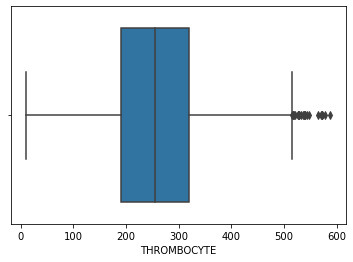

In [63]:
sns.boxplot(df['THROMBOCYTE'])

In [64]:
#MCH 

In [65]:
df['MCH']

0       26.6
1       20.4
2       30.6
3       30.8
5       28.4
        ... 
3234    29.7
3235    25.1
3236    28.2
3237    28.7
3238    29.2
Name: MCH, Length: 3132, dtype: float64

In [66]:
df['MCH'].describe()

count    3132.000000
mean       28.253608
std         2.647943
min        15.500000
25%        27.200000
50%        28.700000
75%        29.800000
max        40.800000
Name: MCH, dtype: float64

D:\conda\envs\pc\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MCH'>

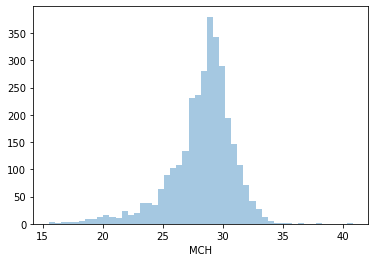

In [67]:
sns.distplot(df['MCH'], hist = True, kde = False, rug = False)

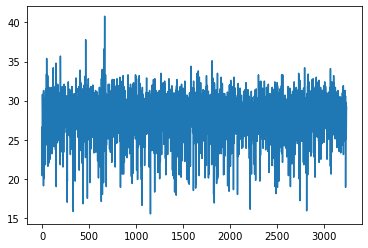

In [68]:
plt.plot(df['MCH'])

D:\conda\envs\pc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MCH'>

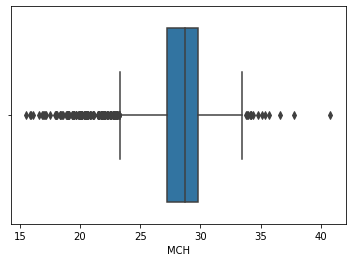

In [69]:
sns.boxplot(df['MCH'])

In [70]:
z = np.abs(stats.zscore(df['MCH']))
print(z)


[0.62458741 2.96640126 0.88626024 ... 0.02024835 0.16860761 0.35746356]


In [71]:
threshold = 3
print(np.where(z > 3))

(array([  13,   16,  142,  255,  257,  316,  336,  418,  445,  461,  486,
        574,  604,  616,  628,  632,  640,  657,  803,  917,  925,  982,
       1021, 1028, 1116, 1161, 1213, 1362, 1368, 1385, 1436, 1494, 1512,
       1518, 1561, 1585, 1589, 1682, 1717, 1769, 1775, 1800, 1810, 1817,
       1915, 1929, 1972, 2014, 2146, 2202, 2243, 2395, 2406, 2421, 2435,
       2558, 2591, 2645, 2655, 2724, 2809, 3121], dtype=int64),)


In [72]:
df.drop(df['MCH'][(z > 3)].index,inplace= True)

In [73]:
df.shape

(3070, 11)

In [74]:
df['MCV']

0       80.9
1       65.0
2       93.9
3       89.7
5       83.2
        ... 
3234    87.6
3235    77.7
3236    86.8
3237    82.0
3238    88.5
Name: MCV, Length: 3070, dtype: float64

In [75]:
df['MCV'].describe()

count    3070.000000
mean       85.053225
std         6.052674
min        62.300000
25%        81.825000
50%        85.500000
75%        88.800000
max       105.900000
Name: MCV, dtype: float64

D:\conda\envs\pc\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MCV'>

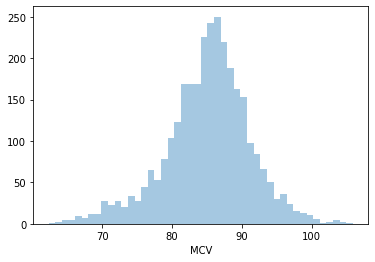

In [76]:
sns.distplot(df['MCV'], hist = True, kde = False, rug = False)

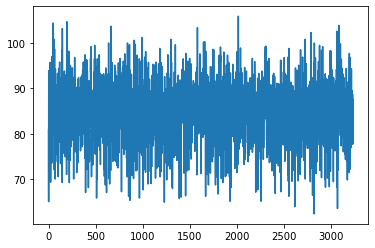

In [77]:
plt.plot(df['MCV'])

D:\conda\envs\pc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MCV'>

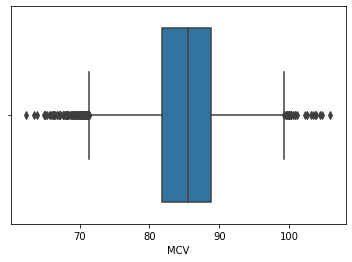

In [78]:
sns.boxplot(df['MCV'])

In [79]:
z = np.abs(stats.zscore(df['MCV']))
print(z)

[0.6862919  3.31365784 1.46186893 ... 0.28864263 0.50452445 0.56955597]


In [80]:
threshold = 3
print(np.where(z > 3))


(array([   1,   43,  183,  479,  622,  803,  817,  914, 1170, 1323, 1340,
       1386, 1504, 1586, 1711, 1830, 1912, 2142, 2280, 2419, 2482, 2660,
       2673, 2913, 2927], dtype=int64),)


In [81]:
df.drop(df['MCV'][(z > 3)].index,inplace= True)

<AxesSubplot:xlabel='SEX', ylabel='count'>

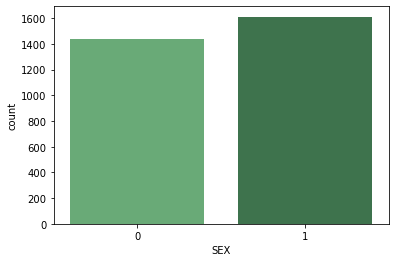

In [82]:
sns.countplot(x='SEX', data = df, palette='Greens_d')

<AxesSubplot:xlabel='SOURCE', ylabel='count'>

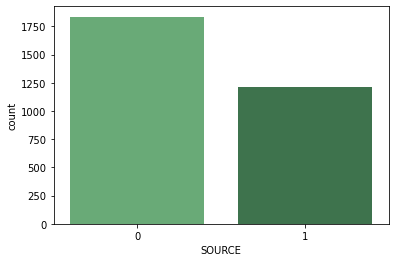

In [83]:
sns.countplot(x='SOURCE', data = df, palette='Greens_d')

In [84]:
data = df.iloc[:, 0:10]

In [85]:
target = df.iloc[:,10]

In [86]:
data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0
5,32.8,11.2,3.94,11.0,324,28.4,34.1,83.2,89,0
6,21.9,7.3,3.06,22.6,237,23.9,33.3,71.6,53,1
...,...,...,...,...,...,...,...,...,...,...
3234,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,1
3235,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,0
3236,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,1
3237,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,1


In [87]:
target

0       1
2       0
3       0
5       0
6       0
       ..
3234    1
3235    1
3236    0
3237    0
3238    1
Name: SOURCE, Length: 3045, dtype: int64

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_data = sc.fit_transform(data)
print(standardized_data.shape)

(3045, 10)


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data,target,test_size = 0.25, random_state = 0)

In [90]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [91]:
y_pred = classifier.predict(X_test)

In [92]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7650918635170604

In [93]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[405,  50],
       [129, 178]], dtype=int64)

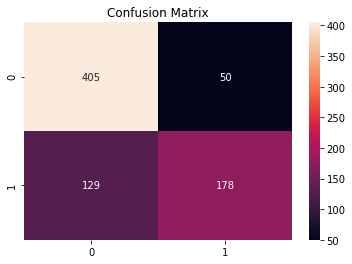

In [94]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [95]:
#GRID SEACRH CV

In [96]:
from sklearn.model_selection import GridSearchCV

In [174]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ('linear', 'rbf')
             } 
  
grid= GridSearchCV(SVC(),param_grid, verbose=3,n_jobs=-1)
    

In [175]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('linear', 'rbf')},
             verbose=3)

In [176]:
print(grid.best_params_)
  


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [100]:
model_new=SVC(C=1, gamma=0.1,kernel='rbf',probability= True)
model_new.fit(X_train,y_train)

SVC(C=1, gamma=0.1, probability=True)

In [101]:
from sklearn import metrics
metrics.accuracy_score(y_test,model_new.predict(X_test))

0.7650918635170604

In [102]:
con_metric = metrics.confusion_matrix(y_test,model_new.predict(X_test))
con_metric

array([[405,  50],
       [129, 178]], dtype=int64)

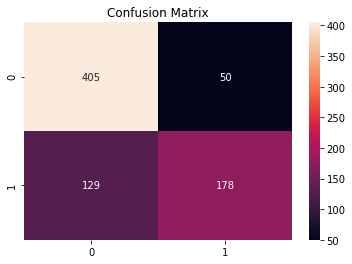

In [103]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [104]:
true_positive = con_metric[0][0]
false_positive = con_metric[0][1]
false_negative = con_metric[1][0]
true_negative = con_metric[1][1]

In [105]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7650918635170604

In [106]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8901098901098901

In [107]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7584269662921348

In [108]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8190091001011123

In [109]:
from sklearn.metrics import log_loss
log_loss(y_test, model_new.predict(X_test))

8.113492066352391

In [110]:
model_new.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [111]:
import pickle
filename = 'svc_1'
pickle.dump(model_new, open(filename, 'wb'))

In [112]:
loaded_model = pickle.load(open(filename, 'rb'))

In [16]:
import pickle
import numpy as np
import pandas as pd
sc = pickle.load(open('scaler.pkl', 'rb'))
model = pickle.load(open('svc_1', 'rb'))
class_names = [0, 1]
def predict(df):
    df = df[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX']]
    jk = {"M": 1, "F": 0}
    df["SEX"] = df["SEX"].map(jk)
    numpy_array = np.array(df)
    numpy_array1 = sc.transform(numpy_array)
    predictions = model.predict(numpy_array1)
    test_pred = model.predict_proba(numpy_array1)
    output = [class_names[class_predicted] for class_predicted in predictions]
    for i in  range(len(output)):
        con = test_pred[i]
        con1 = [round(con[0]*100,1),round(con[1]*100,1)] 
        if(output[i]==0):
        
            res = print("The Patient can be Out Cared. The confidence is ",max(con1),"%")
        else:
            res = print("The Patient can be In  Cared. The confidence is ",max(con1),"%")
    return res

In [17]:
ss = pd.DataFrame([[30.7,10.8,4.16,5.6,331,26.0,35.2,73.8,73,'F']],columns = ['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE','MCH','MCHC','MCV','AGE','SEX'])

In [18]:
predict(ss)

The Patient can be Out Cared. The confidence is  50.9 %


In [19]:
test11 = pd.read_csv("testing_set.csv")
target1 = test11.iloc[:,10]
data = test11.iloc[:, 0:10]

In [20]:
pred1 = predict(data)

The Patient can be Out Cared. The confidence is  88.5 %
The Patient can be Out Cared. The confidence is  79.0 %
The Patient can be Out Cared. The confidence is  50.9 %
The Patient can be Out Cared. The confidence is  82.4 %
The Patient can be Out Cared. The confidence is  80.8 %
The Patient can be Out Cared. The confidence is  76.8 %
The Patient can be Out Cared. The confidence is  84.0 %
The Patient can be Out Cared. The confidence is  66.2 %
The Patient can be In  Cared. The confidence is  84.9 %
The Patient can be Out Cared. The confidence is  83.7 %
The Patient can be Out Cared. The confidence is  83.2 %
The Patient can be Out Cared. The confidence is  82.4 %
The Patient can be Out Cared. The confidence is  62.1 %
The Patient can be Out Cared. The confidence is  81.8 %
The Patient can be Out Cared. The confidence is  83.0 %
The Patient can be Out Cared. The confidence is  86.4 %
The Patient can be In  Cared. The confidence is  85.8 %
The Patient can be Out Cared. The confidence is 

In [158]:
s1 = pd.read_csv('sampletest.csv')

In [159]:
predict(s1)

The Patient can be Out Cared. The confidence is  88.5 %
The Patient can be Out Cared. The confidence is  79.0 %
The Patient can be Out Cared. The confidence is  49.1 %
The Patient can be Out Cared. The confidence is  82.4 %
The Patient can be Out Cared. The confidence is  80.8 %
The Patient can be Out Cared. The confidence is  76.8 %
The Patient can be Out Cared. The confidence is  84.0 %
The Patient can be Out Cared. The confidence is  66.2 %
The Patient can be In Cared.The confidence is  84.9 %
The Patient can be Out Cared. The confidence is  83.7 %
The Patient can be Out Cared. The confidence is  83.2 %
The Patient can be Out Cared. The confidence is  82.4 %
The Patient can be Out Cared. The confidence is  62.1 %
The Patient can be Out Cared. The confidence is  81.8 %


In [160]:
s3 = pd.DataFrame([[41.0,13.3,4.22,4.1,200,31.5,32.4,97.2,74,'M'],[47.6,16.2,5.94,4.4,186,27.3,34.0,80.1,34,'M'],
[38.9,13.0,4.29,10.7,280,30.3,33.4,90.7,36,'M'],
[35.1,11.8,3.98,18.9,259,29.6,33.6,88.2,56,'F'],
[37.1,12.2,4.6,6.5,285,26.5,32.9,80.7,25,'F'],
[48.4,16.3,5.85,7.5,258,27.9,33.7,82.7,18,'F'],
[45.9,15.3,4.87,5.4,278,31.4,33.3,94.3,72,'F'],
[47.4,14.7,7.86,6.1,216,18.7,31.0,60.3,49,'F'],
[39.8,13.1,4.38,7.2,290,29.9,32.9,90.9,64,'F']],
columns = ['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE','MCH','MCHC','MCV','AGE','SEX'])

In [161]:
predict(s3)

The Patient can be Out Cared. The confidence is  88.5 %
The Patient can be Out Cared. The confidence is  84.0 %
The Patient can be Out Cared. The confidence is  66.2 %
The Patient can be In Cared.The confidence is  84.9 %
The Patient can be Out Cared. The confidence is  83.7 %
The Patient can be Out Cared. The confidence is  83.2 %
The Patient can be Out Cared. The confidence is  82.4 %
The Patient can be Out Cared. The confidence is  62.1 %
The Patient can be Out Cared. The confidence is  81.8 %


In [162]:
s5 = pd.DataFrame([[30.0,9.8,3.16,10.1,207,31.0,32.7,94.9,39,'F'],
[34.4,11.3,3.72,4.6,224,30.4,32.8,92.5,58,'M'],[36.1,12.4,4.24,6.0,207,29.2,34.3,85.1,69,'M'],
[46.0,14.9,5.67,6.0,260,26.3,32.4,81.1,24,'M']],columns = ['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE','MCH','MCHC','MCV','AGE','SEX'])

In [163]:
predict(s5)

The Patient can be In Cared.The confidence is  82.0 %
The Patient can be Out Cared. The confidence is  60.3 %
The Patient can be In Cared.The confidence is  55.2 %
The Patient can be Out Cared. The confidence is  79.4 %


In [166]:
predict(ss)

The Patient can be Out Cared. The confidence is  88.5 %


In [167]:

ss = pd.DataFrame([[41.0,13.3,4.22,4.1,200,31.5,32.4,97.2,74,'M']],columns = ['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE','MCH','MCHC','MCV','AGE','SEX'])